# Using Simulated Annealing to model creative cognition
**Shadi Tabatabaeian**

In the following script, I use simulated annealing algorithm to find the best answer to a minimizing objective function as explained in my paper. The main idea is that simulated annealing can represent two phases of creative cognition, known respectively as idea generation and idea evaluation phase (please see the paper the details).

**This script includes three main sections:**

1) Defining the minimizing objective function (i.e., the problem)

2) Implementing simulated annealing algorithm as explained in my paper. 

3) Visualazing the model performance.

Model parameters are selected based on suggestions from:

Parkinson, A. R., Balling, R., & Hedengren, J. D. (2013). Optimization methods for engineering design. Brigham Young University, 5, 11.


Parts of the code are adapted from: http://apmonitor.com/me575/index.php/Main/SimulatedAnnealing


Iteration: 0 with Temperature: 2.8036732520571284
Iteration: 1 with Temperature: 2.7209887640887547
Iteration: 2 with Temperature: 2.640742764466188
Iteration: 3 with Temperature: 2.5628633385466855
Iteration: 4 with Temperature: 2.4872806925571194
Iteration: 5 with Temperature: 2.413927091046384
Iteration: 6 with Temperature: 2.34273679618242
Iteration: 7 with Temperature: 2.2736460088394645
Iteration: 8 with Temperature: 2.206592811422722
Iteration: 9 with Temperature: 2.141517112379222
Iteration: 10 with Temperature: 2.078360592345133
Iteration: 11 with Temperature: 2.017066651881274
Iteration: 12 with Temperature: 1.9575803607499829
Iteration: 13 with Temperature: 1.8998484086878822
Iteration: 14 with Temperature: 1.8438190576304339
Iteration: 15 with Temperature: 1.7894420953454597
Iteration: 16 with Temperature: 1.7366687904340792
Iteration: 17 with Temperature: 1.6854518486587362
Iteration: 18 with Temperature: 1.6357453705591776
Iteration: 19 with Temperature: 1.587504810318398

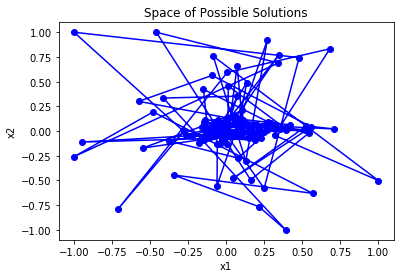

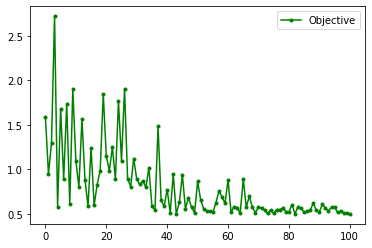

In [23]:
## Importing required packages and libraries:

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random
import math

##################################################
# Defining the Minimizing Objective Function
##################################################
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = 0.7 + x1**2 + x2**2 - 0.1*math.cos(.8*x1) - 0.1*math.cos(9*x2)
    return obj


##################################################
# Implementing Simulated Annealing Algorithm 
##################################################

###STEP ONE: SELECTING MODEL PARAMETERS
Iteration = 100  #Number of iterations

Trial = 100  #Number of trials in each iteration

Accepted = 0.0  #Number of accepted solutions

P_start = 0.7  #Probability of accepting worse solution at the start

P_end = 0.001  #Probability of accepting worse solution at the end
    
T_start = -1.0/math.log(P_start)  # Initial temperature
    
T_end = -1.0/math.log(P_end)   # Final temperature
    
Cool = (T_end/T_start)**(1.0/(Iteration-1.0))  # Fractional reduction every cycle


###STEP TWO: DEFINING A RANDOM INITIAL SOLUTION
x_start = [random.random(), random.random()] ##Specifying a random start location for the model
x = np.zeros((Iteration+1,2))
x[0] = x_start
random_solution = np.zeros(2)
random_solution = x_start
Accepted = Accepted + 1.0   ##keeping track of the number of accepted solutions in each iteration. 


###STEP THREE: DEFINING AND CALCULATING THE COST OF THE RANDOM SOLUTION
current_solution = np.zeros(2)
current_solution = x[0]
best_cost = f(random_solution) ##Best cost refers to the solution with the lowest cost.
current_cost = np.zeros(Iteration+1)
current_cost[0] = best_cost  ##keeping track of the lowest cost objective functions so far.
T = T_start


###STEPS FOUR TO SEVEN: 
    ##DEFINING NEW RANDOM SOLUTIONs
    ##CALCULATING THE COST FOR THE NEW RANDOM SOLUTION
    ##COMPARING THE COST OF NEW AND OLD SOLUTIONS
    ##DETERMINING WHETHER TO MOVE TO THE NEW SOLUTION OR NOT
    ##REPEAT THE ABOVE STEPS AS TEH MODEL SLOWLY COOLS DOWN
    
#specifying the average of the cost difference between the new and the old solution.    
DeltaE_avg = 0.0   

for i in range(Iteration):
    print('Iteration: ' + str(i) + ' with Temperature: ' + str(T))
    
    for j in range(Trial): #Generating new random solutions 
        random_solution[0] = current_solution[0] + random.random() - 0.5
        random_solution[1] = current_solution[1] + random.random() - 0.5
        #Defining search space boundaries.
        random_solution[0] = max(min(random_solution[0],1.0),-1.0) 
        random_solution[1] = max(min(random_solution[1],1.0),-1.0)
        
        #Calculating the difference between the cost of the new and the old solution:
        DeltaE = abs(f(random_solution)-best_cost) 
        #Abobe, best-cost refers to the cost of the last accepted solution.
        #f(random_solution) refers to the cost of the new solution. 
                
         
        
        #Setting up the Boltzmann equation to calcualte the probability of
        #accepting the new solution:
        
           #If the cost of the new solution is higher than the old solution,
        if (f(random_solution)>best_cost):   
            if (i==0 and j==0): DeltaE_avg = DeltaE #then, initialize Delta_avg            
            p = math.exp(-DeltaE/(DeltaE_avg * T))  #Generate probability of acceptance equation.
            if (random.random()<p):  #Compare p to a random number between 0-1.               
                Move = True #If the p is greater, move to the costly solution
            else:
                Move = False #If p is smaller than the random number,
                             #then do not move to the costly solution.
        else:
            Move = True     #If the new solution is less costly, then always move to it.
       
        if (Move == True): #If end up moving to the new solution,
            current_solution[0] = random_solution[0]   #then, update currently accepted solution
            current_solution[1] = random_solution[1]
            best_cost = f(current_solution)  #Also update the best cos so far.
            Accepted = Accepted + 1.0   #Increment number of accepted solutions
            DeltaE_avg = (DeltaE_avg * (Accepted-1.0) +  DeltaE) / Accepted  #Update DeltaE_avg
            
    #Save the best values for x1 and x2 at the end of every iteration 
    x[i+1][0] = current_solution[0]  
    x[i+1][1] = current_solution[1]
    
    #Save the best objective function value at the end of every iteration.
    current_cost[i+1] = best_cost   
    
    #Lower the temperature for the next iteration
    #(i.e., narrow down the search for the best objective function)
    T = Cool * T   
    
#Print final best values for x1 and x2:
print('Best solution: ' + str(current_solution)) 

#Print the final best objective function (i.e., the lowest value for the objective function)
print('Best objective: ' + str(best_cost)) 

##################################################
# Visualizing the Model Performance
##################################################

##MAKING A GRAPH TO KEEP TRACK OF x1 and x2 LOCATIONS IN THE LANDSCAPE IN EVERY ITERATION. 

plt.figure()

plt.title('Space of Possible Solutions')
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x[:,0],x[:,1],'b-o') 


##MAKING A PLOT THAT SHOWS THE VALUES OF THE OBJECTIVE FUNCTION THROUGHOUT 100 ITERATION. 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(current_cost,'g.-')
ax1.legend(['Objective'])

